### By: Shraddha Ramesh

# Introduction

Climate change refers to the changes in the Earth's climate due to human activities that lead to an increasing amount of heat-trapping greenhouse gasses in our atmosphere. This has been causing our planet to warm up, leading to consequences like the melting of the ice caps, rising sea levels, and more heat waves and increased temperatures. According to the Intergovernmental Panel on Climate Change (IPCC), the damage resulting from climate change is likely to get worse over time, and over the next thousands of years, this damage is likely to be irreversible. 

Therefore, through this final tutorial, I am going to start by analyzing how much the carbon emissions, sea levels, average global temperatures and ice cover have fluctuated by since the year 2000, since I want to focus on the effects of climate change in the 21st century. We will go up to the year 2013 in all of the datasets we use, because this is the highest year that the average global temperature data has, and we want all our our datasets to be consistent. As a goal, I am going to train a model to predict what the emission levels, ice cover, sea level, and average global temperatures are going to be in the near future based on the data we have now, so that we can figure out what policies need to be most urgently enacted. 

# Table of Contents

1. Data collection/Curation
2. Data management/Representation
3. Data Visualization and Analysis
4. Hypothesis testing
5. Conclusion/Call to action

# 1) Data Collection/Curation

### Here are some of the datasets that we are going to use for our purposes:

1) CO2-GHG-emssions-data: https://www.kaggle.com/datasets/yoannboyere/co2-ghg-emissionsdata. This dataset is from kaggle.com, and it contains the CO2 emissions for all countries from the year of 1750 to 2017. It contains the columns:
- The country
- The ISO code of the country 
- The year of emission
- The annual CO2 emission values in tonnes

2) Global Sea Level Rise data: https://www.kaggle.com/datasets/jarredpriester/global-sea-level-rise. This dataset is from kaggle.com, and it contains the average sea level in mm per year from 1880-2020. It contains the columns: 
- Year
- Date
- Average sea level in mm (positive number indicates above sea level)

3) Earth Surface Temperature data: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data. This dataset is from kaggle.com, and it will allow us to gain information on how the average surface temperature has changed over the years fof each country from 1743-2013. It contains the columns:
- Date
- Average Temperature in degrees Celsius
- Average Temperature Uncertainty (with a 95% confidence interval around the average)
- Country


### Imports we are using here:

- **Pandas:** Pandas is an open source data analysis and manipulation tool that is built on top of python.
- **Numpy:** Pandas is built on top of a package called numpy, which facilitates working with multi-dimensional arrays. 

### **Below, we are downloading all of these datasets as a csv file and using pandas to read the csv file and display it as a dataframe. Pandas provides a function called read_csv that allows us to do this.**

In [131]:
import pandas as pd
import numpy as np

# create dataframe for CO2 emissions per country using a csv file.
emissions = pd.read_csv('co2_emission.csv')
emissions

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [132]:
# create dataframe for average global sea rise using a csv file.
sea_levels = pd.read_csv('Global_sea_level_rise.csv')
sea_levels

,year,date,mmfrom1993-2008average
0,1880,07/15/1880,-183.247396
1,1881,07/15/1881,-174.014062
2,1882,07/15/1882,-190.080729
3,1883,07/15/1883,-185.147396
4,1884,07/15/1884,-166.280729
...,...,...,...
136,2016,7/15/2016,54.346964
137,2017,7/15/2017,57.355991
138,2018,7/15/2018,53.085122
139,2019,7/15/2019,61.393713


In [133]:
# create dataframe for average surface temperature per country using a csv file.
surface_temperature = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
surface_temperature

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


# 2) Data Management/Representation

### A lot of the columns in our dataset are unnecessary, or need to be renamed or modified. So, we are going to manage the way that we represent some of this data.

### **First, let us start with the emissions dataframe and see what we can do to tidy it, and the steps taken to do so are shown below in the comments:**

In [134]:
# The country code is not relevant to our analysis, so we drop it
emissions.drop('Code', axis = 1, inplace = True)

# Rename columns to be more descritive and concise
emissions.rename(columns = {'Entity': 'Country'}, inplace = True)

# Convert all the logically numeric data types to have an integer representation
emissions['Year'] = emissions['Year'].astype(int)
emissions['Annual CO₂ emissions (tonnes )'] = emissions['Annual CO₂ emissions (tonnes )'].astype(int)

# Drop years less than 2000 because I only want to focus on data from the 21st century (most recent data)
emissions.drop(emissions[emissions['Year'] < 2000].index, inplace = True)
emissions.drop(emissions[emissions['Year'] > 2013].index, inplace = True)

df_World=emissions[emissions["Country"]=="World"]

# Drop any elements that are actually continents, since they are too broad for our analysis
emissions.drop(emissions[emissions['Country'] == "Americas (other)"].index, inplace = True)
emissions.drop(emissions[emissions['Country'] == "Africa"].index, inplace = True)
emissions.drop(emissions[emissions['Country'] == "Asia and Pacific (other)"].index, inplace = True)
emissions.drop(emissions[emissions['Country'] == "EU-28"].index, inplace = True)
emissions.drop(emissions[emissions['Country'] == "Europe (other)"].index, inplace = True)
emissions.drop(emissions[emissions['Country'] == "International transport"].index, inplace = True)
emissions.drop(emissions[emissions['Country'] == "Statistical differences"].index, inplace = True)
emissions.drop(emissions[emissions['Country'] == "World"].index, inplace = True)
emissions

,Country,Year,Annual CO₂ emissions (tonnes )
51,Afghanistan,2000,768195
52,Afghanistan,2001,812074
53,Afghanistan,2002,1064074
54,Afghanistan,2003,1187070
55,Afghanistan,2004,941455
...,...,...,...
20844,Zimbabwe,2009,5519508
20845,Zimbabwe,2010,7681010
20846,Zimbabwe,2011,9439850
20847,Zimbabwe,2012,7614600


**Explanation of Tidying:** We want to clean the emissions dataset so that it will be easier for our analysis. First off, I removed the "Code" column because that is not relevant to our analysis since we already have the name of the country. Also, since I established that I only want to focus on data from 2000-2013, I dropped any of the rows whose year is less than 2000 because our data starts from 1750. Also, most importantly, I decided to drop rows whose Entities were actually continents rather than countries (like Asia, Europe, Africa, etc) because I wanted to focus on each entity on a smaller scale, like, for example, focusing on individual countries instead. If we just compared a singular country, like the United Kingdom, to a whole continent like Asia, it would not give us a clear picture of which countries in Asia are most responsible for the emissions and how it compares to the U.K, so it is better to drop the full continents and focus on entities on a smaller scale. The result above is our cleaned up data. 

### **Second, let's clean up the global sea level data, and the steps taken to do so are shown below in the comments:**

In [135]:
# Rename column so that it is more descriptive
sea_levels.rename(columns = {'mmfrom1993-2008average': 'Average Sea Level (mm)', 'year': 'Year'}, inplace = True)
sea_levels.drop("date", axis = 1, inplace = True)

# we want to have a float representation of the average sea level and int representation of the year
sea_levels['Average Sea Level (mm)'] = sea_levels['Average Sea Level (mm)'].astype(float)
sea_levels['Year'] = sea_levels['Year'].astype(int)

# Drop years less than 2000 because I only want to focus on data from the 21st century (most recent data)
sea_levels.drop(sea_levels[sea_levels['Year'] < 2000].index, inplace = True)
sea_levels.drop(sea_levels[sea_levels['Year'] > 2013].index, inplace = True)
sea_levels

,Year,Average Sea Level (mm)
120,2000,2.952604
121,2001,4.719271
122,2002,2.152604
123,2003,14.619271
124,2004,13.652604
125,2005,12.119271
126,2006,9.519271
127,2007,22.785937
128,2008,30.452604
129,2009,33.652604


**Explanation of Tidying:** The tidying for this part is pretty simple. I just dropped all of the years less than 2000 since we want to focus on data from 2000 onwards and the year in the original dataset starts at 1880. The data for this was already pretty tidy for the most part.

### **Finally, let's clean up the global land temperature data, and the steps taken to do so are shown below in the comments:**

In [136]:
# Drop this column because we don't need it for our calculations
surface_temperature.drop("AverageTemperatureUncertainty", axis = 1, inplace = True)
surface_temperature.rename(columns = {'AverageTemperature': 'Average Surface Temperature (Celsius)'}, inplace = True)

# Drop any rows that have an NaN value for average temperature
surface_temperature = surface_temperature.dropna()

# Move country to be the first column
surface_temperature = surface_temperature.reindex(columns=['Country','dt', 'Average Surface Temperature (Celsius)'])

# Let's convert the date to a date-time object so that it will be easy to access the year
surface_temperature['dt'] = pd.to_datetime(surface_temperature['dt'], format = '%Y-%m-%d')
# Just like with the previous datasets, let's only use years from 2000 and up. 
surface_temperature.drop(surface_temperature[surface_temperature['dt'].dt.year < 2000].index, inplace = True)

# Simplify the table by finding the average temperature per year for each country, and to_numpy will convert our
# data frame to a numpy array, and np.unique allows all of the values in the numpy array to be unique.
countries_arr = np.unique(surface_temperature[surface_temperature.columns[0]].to_numpy())
years_arr = list(range(2000, 2014))
average_arr = []
for country in countries_arr:
    for year in years_arr:
        # drop all the rows that do not focus on that country at that year, and create a new table that contains
        # the years of 2000-2013 for just that particular country.
        flag = ((surface_temperature['Country'] == country) & (surface_temperature['dt'].dt.year == year))
        idx = surface_temperature[flag == False].index
        curr_table = surface_temperature.drop(labels=idx, inplace = False)
        # find the average temperature for that country for that year
        average = curr_table['Average Surface Temperature (Celsius)'].mean()
        average_arr.append(average)

# create a new dataframe that contains the the average temperature per year for each country, so we are basically trying to
# remove the individual dates and combine it into a year
tidy_temperature = pd.DataFrame()
tidy_temperature['Country'] = ""
tidy_temperature['Year'] = 0
tidy_temperature['Average Surface Temperature This Year (Celsius)'] = 0.0
i = 0
index = 0
for country in countries_arr:
    for year in years_arr:
        tidy_temperature.at[i, 'Country'] = country
        tidy_temperature.at[i, 'Year'] = year
        tidy_temperature.at[i, 'Average Surface Temperature This Year (Celsius)'] = average_arr[i]
        i = i + 1
    
tidy_temperature['Year'] = tidy_temperature['Year'].astype(int)
tidy_temperature

,Country,Year,Average Surface Temperature This Year (Celsius)
0,Afghanistan,2000,15.497833
1,Afghanistan,2001,15.778083
2,Afghanistan,2002,15.537667
3,Afghanistan,2003,14.916000
4,Afghanistan,2004,15.770917
...,...,...,...
3383,Åland,2009,6.489083
3384,Åland,2010,4.861917
3385,Åland,2011,7.170750
3386,Åland,2012,6.063917


**Explanation of Tidying:** If we notice from the previous version of this data, the dataframe contained the carbon emissions at invidual dates (first day of each month) for each year rather than the whole year itself (ex: 1743-11-01, 1743-12-01, 1744-01-01). It would be easier for us to work with data that is encapsulated by each whole year for each country rather than having the data for the carbon emissions be separated by each month because it would make our graphs/data visualizations more clutered and harder to read. A potential trade-off is that focusing on each month could give us a lot more detail on the data, but when it comes to the amount of carbon emissions, we can still get enough information by analyzing how the carbon emissions changed by each year overall for each country, and it would also match the rest of the data since the other two datasets are organized by year rather than individual months. Again, I dropped all of the years that were less than 2000 since the data starts from 1743. Basically, I looped through all of the countries in the dataframe, and temporarily dropped any rows that were not focusing on the particulaar year and country that we were on at that interation. Then, I calculated the average emission value for that year specific year through using all the months in that year, and then I created a new dataframe that would just have the country, the year, and the average emission for that country at a specific year, which is shown in the dataframe above. 

**Let's take about Datetime:** As you may have noticed above, I converted the date column in the original dataframe into a datetime object. Datetime is given to us by the pandas library, and it provides us with classes that allows us to manipulate dates by formatting them by year, month, and day. Through this, we can easily extract the year, month, and day, so it makes it easy to access these elements, as I did above. Another alternative would be using string slicing to try to extract the year, month, and day separately from a string like 1743-12-01 and then use them, like separating each element based on the "-" mark, but making use of pandas's datetime makes these extractions a lot easier due to its built in parsing that helps separate a date into separate components. If you want to learn more about datetime and working with it, you can check out this link: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587


### **Now, let us combine our surface temperature table with our emissions table from before so we can be consistent in the countries that we are focusing on and view the data for these side by side. This is a resource that we will save for later, and I will bring it up again and explain more about it later in this tutorial.**

In [137]:
# Merge the dataframes together on year and country
temp_emissions_table = emissions.merge(tidy_temperature, how = 'inner', on = ['Country', 'Year'])

temp_emissions_table

,Country,Year,Annual CO₂ emissions (tonnes ),Average Surface Temperature This Year (Celsius)
0,Afghanistan,2000,768195,15.497833
1,Afghanistan,2001,812074,15.778083
2,Afghanistan,2002,1064074,15.537667
3,Afghanistan,2003,1187070,14.916000
4,Afghanistan,2004,941455,15.770917
...,...,...,...,...
2590,Zimbabwe,2009,5519508,21.377250
2591,Zimbabwe,2010,7681010,21.986250
2592,Zimbabwe,2011,9439850,21.602417
2593,Zimbabwe,2012,7614600,21.521333


# 3) Data Visualization

### **Let's visualize our data using many different graphs so we can analyze its results. First, let us do plot some basic graphs that show us the relationship of year vs emissions (dependent), year vs surface temperature( dependent), and year vs sea levels (dependent) so we can analyze how each of these dependent variables have changed as a result of the independent variable year**

### Imports we are using here:

- **Matplotlib:** I am going to be using matplotlib because it is a good tool for basic plotting, since it provides tools that allows for a user to create bar charts, line plots, scatterplots, and more. It can also be well integrated with numpy and pandas, which is useful since we are using numpy and pandas for this tutorial.

- **Seaborn:** Seaborn extends matplotlib and it allows us to access a variety of visualization patterns and provides a lot of additional themes to matplotlib, while also using matplotlib in order to create its plots. So, if we pair these visualization methods together, we can create detailed and polished graphs that will help us analyze the data well. 

I am going to use a lineplot to visualize a lot of the data. We have a lot of options on the different types of graphs that we can use to visualizie the data, like lineplots, bar charts, pie charts, etc. Visualization methods like bar charts and pie charts are useful when we want to compare diffences and similaries among groups, but they are not great for visualizing changes over time. That's why a line graph would better suit our purposes here, because we want to witness how the emissions, surface deperature, and sea levels change over time, which can be more easily visualized with a line plot. 

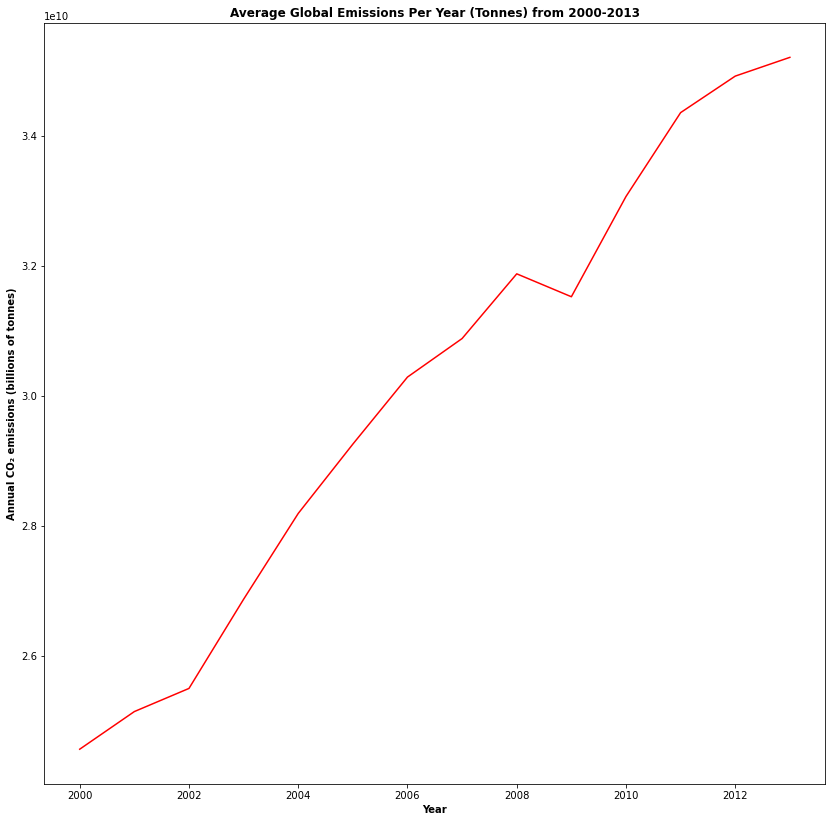

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Average Global Emissions Per Year (Tonnes) from 2000-2013', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Annual CO₂ emissions (billions of tonnes)', fontweight = 'bold')

# lineplot function helps us create a lineplot with year on the x-axis and emissions on the y-axis
sns.lineplot(x='Year', y='Annual CO₂ emissions (tonnes )', data=df_World, color='red')
plt.show()

**Analysis:** Let's talk about what we did above and analyze the results. As we can see from the trend line in our lineplot, the Annual CO2 emissions, which is our dependent variable, is increasing as the year, our independent variable, increases. This graph is basically telling us that annual CO2 emissions are increasing as the years go by. In the year 2000, our annual CO2 emissions in tonnes at this point is about 24 billion metric tonnes. However, by 2013, this amount has gone up to about 36 billion metric tonnes, which shows a rise of about 50% in carbon emissions. According to NASA, carbon dioxide is a huge contributor to climate change, because it is a heat trapping gas that can generate from the extraction and burning of fossil fuels, so this observed increase in CO2 emissions over the years is definitely a concern that we should keep in mind. 

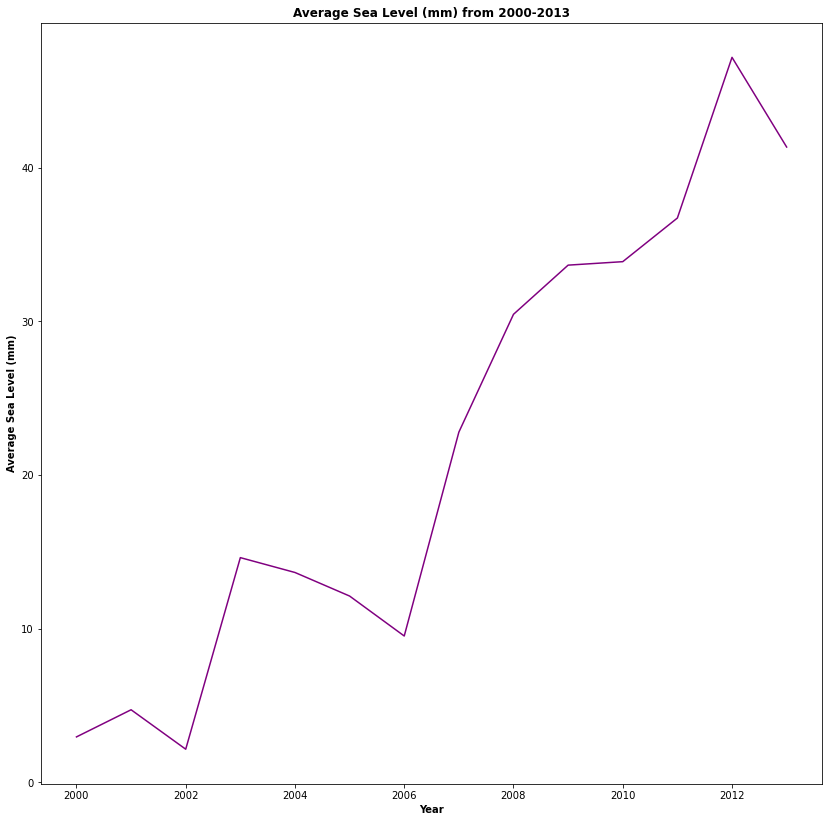

In [139]:
# first label the graph by adding a title, and giving a name to the x-axis and y-axis
plt.title('Average Sea Level (mm) from 2000-2013', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Average Sea Level (mm)', fontweight = 'bold')

sns.lineplot(x=sea_levels['Year'], y=sea_levels['Average Sea Level (mm)'], data=sea_levels, color='purple')
plt.show()

**Analysis:** As we can see from the graph above, just like the previous line plot, the average sea level has risen overall from 2000-2013. Although there are some fluctuations where the line seems to dip, there is an overall increase in our trend line. The mean sea level refers to the height of the sea with respect to a land benchmark, and a positive average sea level indicates that the sea level is slowly rising above the previous elevation at sea level, which is marked by 0 ft. In 2000, our average sea level is about 4mm, but in 2013, that has drastically increased to about 40-45mm, which shows that the sea level is in fact rising. Due to the increasing amount of carbon emissions as we have described above, glaciers and ice sheets are melting all around the world, which is leading to this observed rise in sea level. 

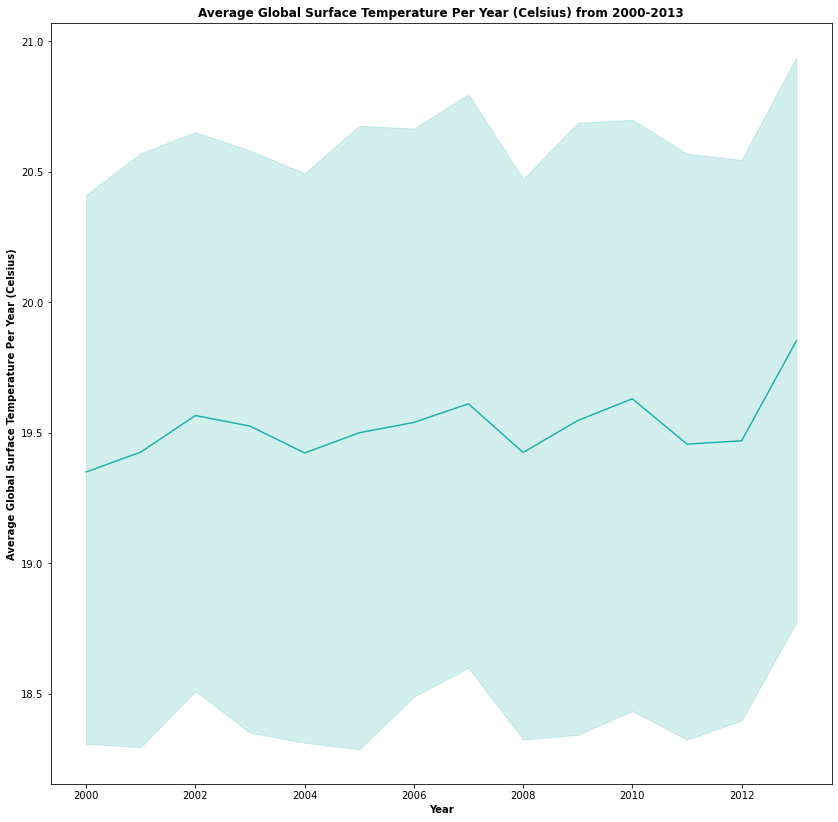

In [140]:
plt.title('Average Global Surface Temperature Per Year (Celsius) from 2000-2013', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Average Global Surface Temperature Per Year (Celsius)', fontweight = 'bold')

sns.lineplot(x=tidy_temperature['Year'], y=tidy_temperature['Average Surface Temperature This Year (Celsius)'], data=tidy_temperature, color='lightseagreen')
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

**Analysis:** As we can see from the graph above, the average global surface temperature is increasing overall as the years go on. In the year 2000, we can see that the average temperature is about 19.4 degrees celsius globally. However, we can see that in 2013, it increased to about 20 degrees celsius globally. The line shadow that we see around the line represents the confidence interval, so the line is our central tendency, where each point in the line represents a single value for each year that representative of the entire distribution. Now, let us think about these three graphs together. Overall, all of the three graphs for year vs emissions, year vs surface temperature, and year vs sea levels show an increase, so we can postulate that as the amount of emissions increase as the years go by, the sea level continues to rise and the average global temperature continues to rise. 

**Resource**: If you want to learn more about creating a lineplot using sns, this link may be helpful: https://stackabuse.com/seaborn-line-plot-tutorial-and-examples/

### Now that we have analyzed these results, we want to delve deeper into the analysis and look at which countries in specific are responsible for a large amount of the emissions. So, let's first find the top 10 countries in our emissions dataframe that are responsible for the emissions using the code below: 

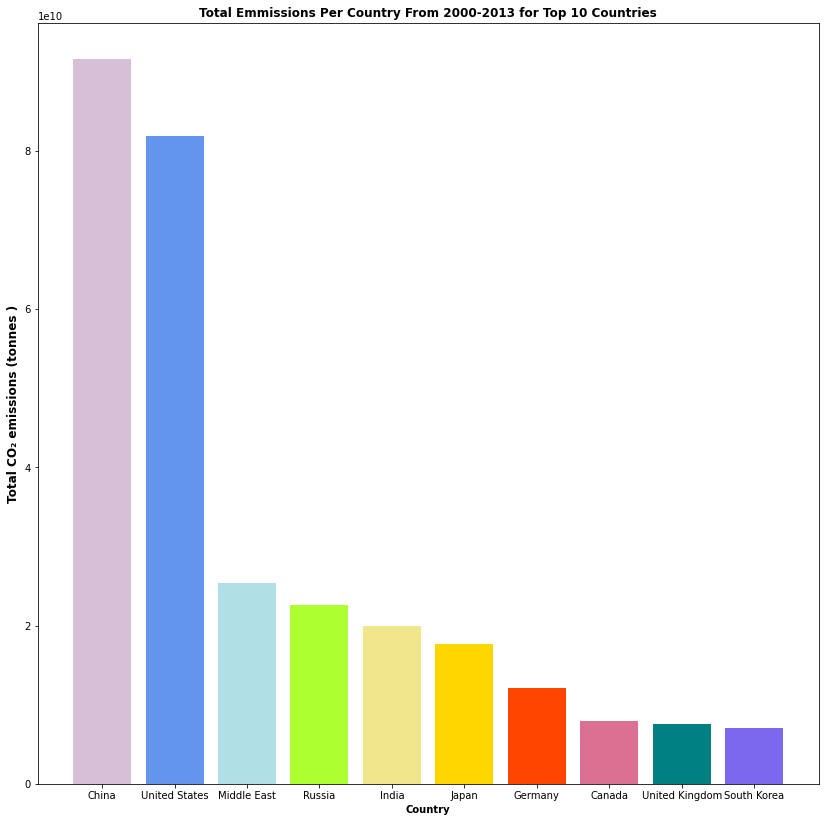

In [150]:
# We can use groupby's .sum() method to sum up all of the CO2 emissions for each country
top10_emissions = emissions.groupby('Country')['Annual CO₂ emissions (tonnes )'].sum()
# If we sort the emissions in descending order and only take the first 10, we will get the ten key players that
# have the most carbon emissions
top10_emissions.sort_values(ascending = False, inplace = True)
top10_emissions = pd.DataFrame(top10_emissions).head(10)
top10_emissions
# The code above gave us the ten key players, and I decided to put them all into an array to pass it to the bar graph
countries_arr = ["China", "United States", "Middle East", "Russia", "India", "Japan", 
                 "Germany", "Canada", "United Kingdom", "South Korea"]

plt.title("Total Emmissions Per Country From 2000-2013 for Top 10 Countries", fontweight = 'bold')
plt.xlabel("Country", fontweight = 'bold')
plt.ylabel("Total CO₂ emissions (tonnes )", fontweight = 'bold', fontsize = '12')

emissions_arr = np.unique(top10_emissions[top10_emissions.columns[0]].to_numpy())

# We can use plt.bar to create the bar plot, and we pass in the countries_arr for the x axis of countries, the
# emissions_arr for the y-axis of emissions (I reversed it because the values were stored backwards initially)
plt.bar(countries_arr, emissions_arr[::-1], color = ['thistle', 'cornflowerblue', 'powderblue', 'greenyellow', 
                                                     'khaki', 'gold', 'orangered','palevioletred', 'teal', 'mediumslateblue'])
plt.rcParams["figure.figsize"] = (25,8)
plt.show()

**Let's Review The Code:** In case the code above is confusing, let us reiterate the steps taken to create the bar graph above. Our dataframe contains the emissions for each year for each country, and groupby's .sum() method allows us to calculate the total emissions for each country by adding the emmissions during each year (2000-2013) together for each country. Then, we sort the emissions in descending order and extract the top 10, which will give us the 10 countries with the highest emissions. We then use matplotlib's bar graph to visualize the total CO2 emissions for these top 10 key players. 
- **Why I choose GroupBy:** Pandas provides groupby as a means to put identical data into groups and allows you to perform some type of function on the grouped data. Rather than iterating through every row of a specific country and keeping a sum variable for total emissions of each country in the data and continously adding to it, which would take a lot of lines of code and a lot of computational power, it is easier to group the data together by country using groupby and calculate the total emissions for each country using .sum() in one line of code. This link has always been helpful for me when trying to understand groupbys: https://sparkbyexamples.com/pandas/pandas-groupby-explained-with-examples/

**Analysis:** As we can see from the bar graph above, the places with the highest total emissions are China, U.S, Middle East, Russia, India, Japan, Germany, Canada, UK, and South Korea, which are all shown in terms of descending order. China and the United States seem to be the world's two biggest players in overall CO2 emissions. According to BBC, coal has been China's main source of energy for decades, and its massive consumption of this fossil fuel causes it to be a huge emitter of carbon dioxide. They further say that China will need to stop relying enitrely on coal to produce electricity by 2050 and focus on renewable energy production in order to decrease its greenhouse gas emissions. Furthermore, the United States, according to inspirecleanenergy.com, all of the daily communiting, business travel, and other energy usage in the day to day lifestyles of the United States causes a high increase in CO2. The Middle East, Russia, and India tag behind. While their total CO2 level is not as high as China and the United States, they still make the top 5 for the highest carbon emitors. 

**If you want to read more on the sources I mentioned above, here are some links:**
- https://www.bbc.com/news/world-asia-china-57483492
- https://www.inspirecleanenergy.com/blog/clean-energy-101/average-american-carbon-footprint


### **Now that we are able to visualize the top 10 key players in carbon emissions, let us also visualize how the carbon emissions have increased over the years for each country.**

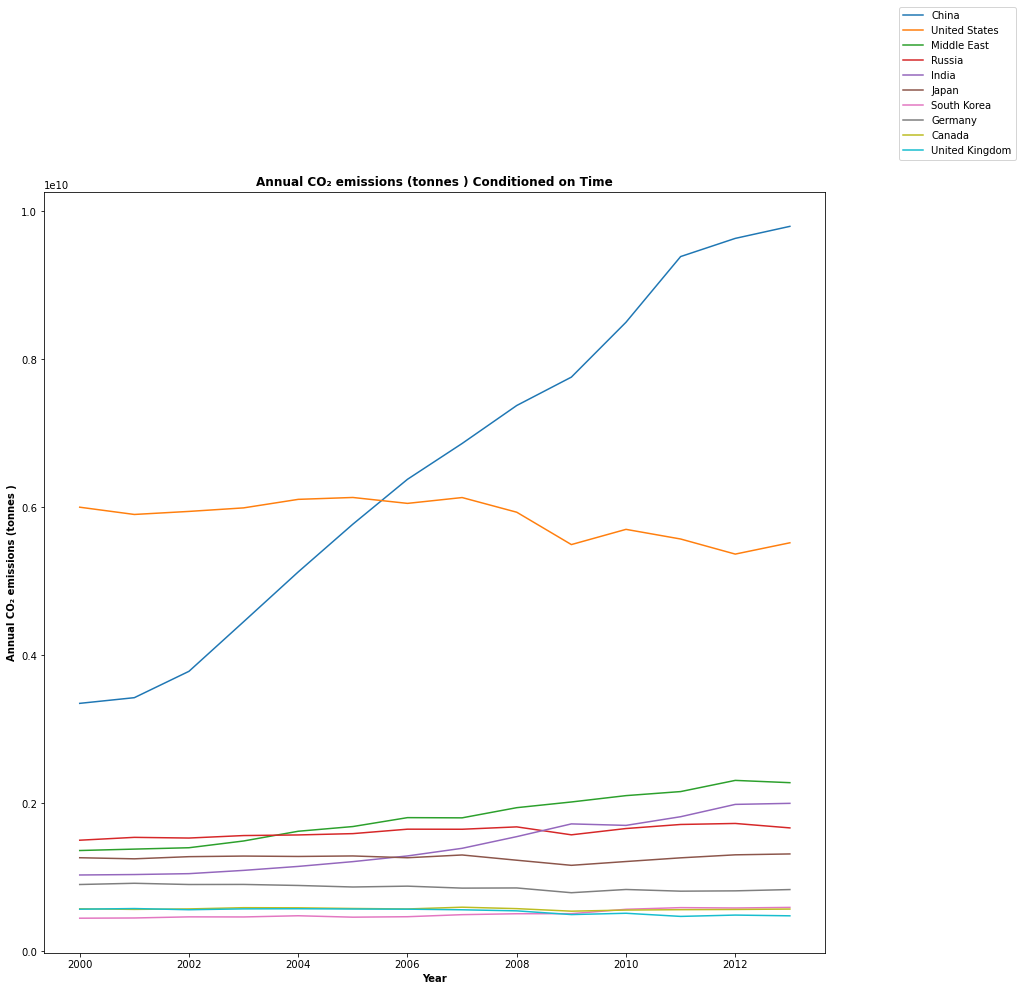

In [152]:
# First, we want to create a new dataframe that only contains the top 10 key players. 

countries_arr = ["China", "United States", "Middle East", "Russia", "India", "Japan", "South Korea", 
                 "Germany", "Canada", "United Kingdom"]
top10df = emissions.drop(emissions[~emissions['Country'].isin(countries_arr)].index, inplace = False)

plt.title("Annual CO₂ emissions (tonnes ) Conditioned on Time", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.ylabel('Annual CO₂ emissions (tonnes )', fontweight = 'bold')

for country in countries_arr:
    flag = country == top10df['Country']
    idx = top10df[flag == False].index
    curr_table = top10df.drop(labels=idx, inplace = False)
    plt.plot(curr_table['Year'], curr_table['Annual CO₂ emissions (tonnes )'], label = country)

plt.rcParams["figure.figsize"] = (14,14)
plt.legend(bbox_to_anchor =(1.25, 1.25))
plt.show()

**Analysis:** Overall, just to reiterate from our previous analyses, we can see from the graph that the overall annual CO2 emissions for most of the top 10 countries are increasing overall as the years go by. Also, just as we saw from our bar chart, China (shown in blue) and the United States (shown in orange0 have significantly higher emissions than the other countries in the top 10, with Middle East (green), Russia (red), and India (purple) being below them, but still being similar to each other in CO2 emissions. Also, we can see that in 2006, China seems to overtake the U.S. in the amount of CO2 emissions. China seems to show an increase its annual emission rate at a steeper and more drastic rate from 2000-2013 than the United States does, which seems to actually decrease and then fluctuate a little bit from 2005 onwards, although the total carbon emissions for the US overall is still greater than most of the other top 10 countries. According to carbonbrief.org, a number of factors are leading to a gradual CO2 emission decrease in the U.S, like attempting to switch from coal to gas and an increase in wind power. 

**Resources to learn more about what was described above:** 
- https://www.carbonbrief.org/analysis-why-us-carbon-emissions-have-fallen-14-since-2005/

# 4) Hypothesis Testing

### ***Now that we have analyzed the data for past years, we want to see what the future holds for us. This way, we can gain some insight into what policies need to be implemented and which countries need to take further steps into becoming more sustainable***.

In order to do this, we are going to going to use a supervised machine learning algorithm called linear regression. Linear regression is used when we want to predict a continuous value, so it is basically used when we want to understand the relationship between independent and dependent variables. Another supervised machine learning algorithm is called classification, which is used to map input variables into discrete categories. Classification can be good to use if any input data that we give a machine learning algorithm can easily be labeled into different categories. **However, linear regression would be better for our purposes because the problem we are trying to solve does not involve classifying data, but trying to predict a continuous value by figuring out how CO2 emissions, sea level, and global temperature (dependent variables) are effected by the independent variable of the year.**

Additionally, let's talk a little about why we chose to use a supervised learning algorithm rather than an unsupervised learning algorithm. Supervised learning algorithms are mostly used when we want to classify data or form a prediction based on an existing relationship between input and output data, while unsupervised learning models can be chosen when we are dealing with raw, unlabeled data that that we still have to identify underlying patterns for. **In our case, since there is an already pattern between variables in our dataset and we want to make future predictions based on that pattern, supervised learning is what we are choosing to use here.**

**Important functions that we need to use:**
- **.fit()** in a linear regression model will fit the model and generate a coefficient and intercept. It allows us to identify a relationship between an independent predictor variable and a response variable so that we can fit an equation and use it for prediction. We give it a training set and a test set. A linear equation is in the form of y = mx + b, where m is our slope, b is our y-intercept, and x is the independent predictor value that we pass in. 
- **.predict()** is a method that will allow us to predict what the response variable for a given input will be based on the regression equation that we acquired through the .fit() method. In our case, we want to pass in the year as our x in the linear equation so that we can predict how the emissions, global sea level, and surface temperature are effected in future years based on the data we have now.

**Here are some resources to learn more about linear regression and classification:**
- https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
- https://www.springboard.com/blog/data-science/regression-vs-classification/#:~:text=The%20most%20significant%20difference%20between,types%20of%20machine%20learning%20algorithms.
<br>

**Here is a resource to learn about supervised vs unsupervised machine learning models:**
- https://www.seldon.io/supervised-vs-unsupervised-learning-explained#:~:text=Supervised%20machine%20learning%20is%20generally,the%20need%20for%20labelled%20data.

### Imports we are using here:

- **Sklearn.linear_model import LinearRegression:** An import that allows us to fit a linear model and peform a linear regression.
- **Statsmodels.formula.api:** statsmodels provides us with functions for estimations of different statistical models, like OLS( ). The OLS function is used to perform an **Ordinary Least Squares, or OLS**, regression, which is useful because we can obtain a detailed description about the regression results and gain access to metrics like the p-value.

## Emissions:

**Null hypothesis** tells us that there is no statistical relationship between the variables (independent and dependent) that we are trying to measure. We can measure the strength of the null hypothesis using something called a **p value**, and if our p value is less than 0.05, which is our significance threshold, then we have enough evidence to reject the null hypothesis. 

##### First, let's figure out by how much (in tonnes) emissions have changed over the years, and we will use linear regression to do so. Let us write our null hypothesis for the emissions data:

**Null Hypothesis:** There is no relationship between the year and the annual CO2 emissions in tonnes. 

In [143]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

# Create a model so that we can do linear regression
regression_emissions = LinearRegression()

# Find the cumulative sum for each year and store it as a list, and create another list containing all the years
cumulative_emissions = np.array(emissions.groupby("Year")['Annual CO₂ emissions (tonnes )'].sum())
years = list(range(2000,2014))

# Add each year in its own little array to create a 2D array for the fit
y = []
for year in years:
    y.append([year])
    

# use ols to calculate the p value
df = pd.DataFrame({'years':years, 'emissions':cumulative_emissions})
# performs ols regressions with emissions dependent on years and extracts the p value
model = sm.ols('emissions~years', data=df).fit().pvalues[1]
print('\033[1m' + "P value : " + str(model) + '\033[0m')

P value : 3.5514478367523492e-12


Since our p value is less than 0.05, we can reject our null hypothesis and accept an alternate hypothesis, claiming that there is a relationship between the year and annual CO2 emissions. Thus, we can find a coefficient that tells us how much the CO2 emissions in tonnes increases as the years go by.

In [159]:
# fit the model for linear regression so that we can access the coefficient
regression_emissions.fit(y, cumulative_emissions)
coefficient = regression_emissions.coef_[0]
print('\033[1m' + "CO2 Emissions increases by : " + str(coefficient) + " tonnes per year" + '\033[0m')

CO2 Emissions increases by : 872580738.3538461 tonnes per year


##### Now, let's create a graph for annual co2 emissions that contains the regression line. 

<AxesSubplot:title={'center':'Cumulative Annual CO2 Emissions (Tonnes) Graph With Regression Line'}, xlabel='Year', ylabel='CO2 Emissions (Tonnes)'>

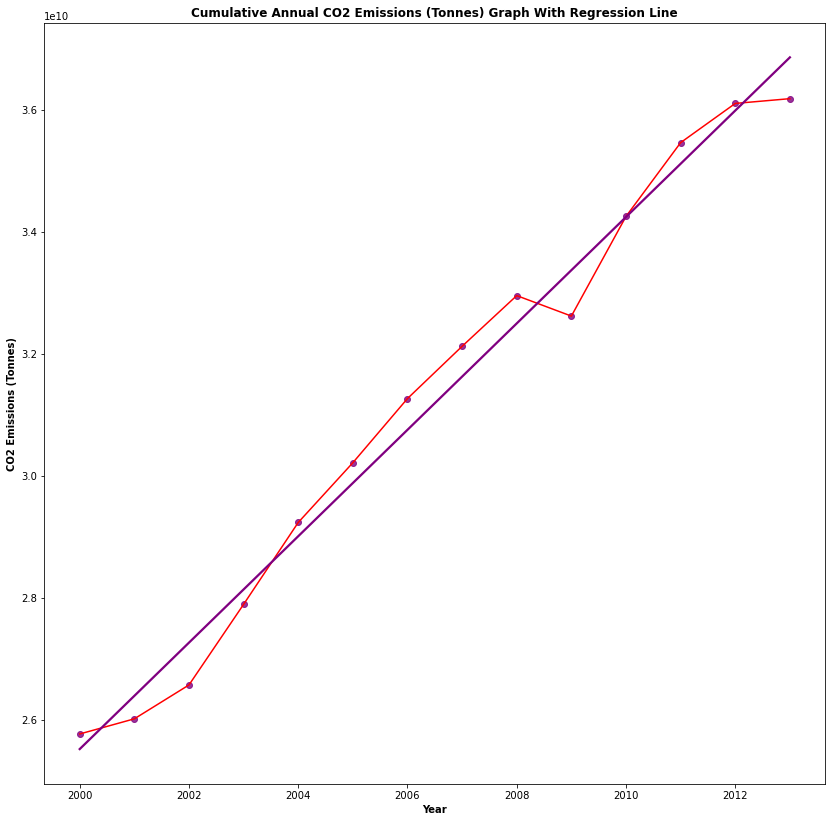

In [145]:
plt.title("Cumulative Annual CO2 Emissions (Tonnes) Graph With Regression Line", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("CO2 Emissions (Tonnes)", fontweight = 'bold')
sns.lineplot(x = years, y = cumulative_emissions, color = 'red')
sns.regplot(x = years, y = cumulative_emissions, ci = False, color = 'purple')

Before we move onto predicting future emission rates, let us analyze what we currently have above. In order to faciliate the process, I added all of the emissions for each individual year (includes all countries) and then plotted the CO2 emissions for each year so I can get an overall picture of the rate at which carbon emissions are globally increasing every year. The purple line represents our regression line, while the red line represents the points of our actual data. As we can see, the linear regression line has a positive slope, which indicates that as our independent variable (year) increases, our dependent variable (CO2) emissions is drastically increasing, due to the steep nature of the slope. This indicates that overall, just like we discussed before, CO2 emissions have also increased over the years. Also, we calculated our regression coefficient above using the linear regression, which came to about 872580738.35 tonnes/year, indicating that CO2 emissions increases at about 872 million tonnes a year. **Thus, using this data, we can make a prediction that annual global CO2 emissions are going to continue to drastically increase in the next 10 years from our current year 2022. We will test these predictions shorty.**

# Sea Level:

##### First, let's figure out by how much (in mm) sea leves have risen over the years, and we will use linear regression to do so.  Let us first state our null hypothesis. If you need a refresher on what it is, look at its description above when we are doing linear regression on emissions. 

**Null Hypothesis:** There is no relationship between the year and the annual sea level rise in mm. 

In [146]:
regression_sea = LinearRegression()

# Create on array that contains the years and another array that contains the sea level for each year
years = list(range(2000,2014))
sealevel_mm = sea_levels[sea_levels.columns[1]].to_numpy()

# Add each year in its own little array to create a 2D array for the fit
y = []
for year in years:
    y.append([year])
    
df = pd.DataFrame({'years':years, 'sea_level':sealevel_mm})
# performs ols regressions with sea level mm dependent on years and extracts the p value
model = sm.ols('sea_level~years', data=df).fit().pvalues[1]
print('\033[1m' + "P value : " + str(model) + '\033[0m')

P value : 1.025176144433533e-07


Since our p value is less than 0.05, we can reject our null hypothesis and accept an alternate hypothesis, claiming that there is a relationship between the year and annual sea level rise. Thus, we can find a coefficient that tells us how much the sea level in mm rises as the years go by.

In [147]:
# fit the model for linear regression so that we can access the coefficient
regression_sea.fit(y, sealevel_mm)
coefficient_sea = regression_sea.coef_[0]
print('\033[1m' + "Sea Level is rising by : " + str(coefficient_sea) + " mm per year" + '\033[0m')

Sea Level is rising by : 3.47293006534066 mm per year


##### Now, let's create a graph for global sea level rise that contains the regression line. 

<AxesSubplot:title={'center':'Sea Level Rise Graph (mm) With Regression Line'}, xlabel='Year', ylabel='Sea Level (mm)'>

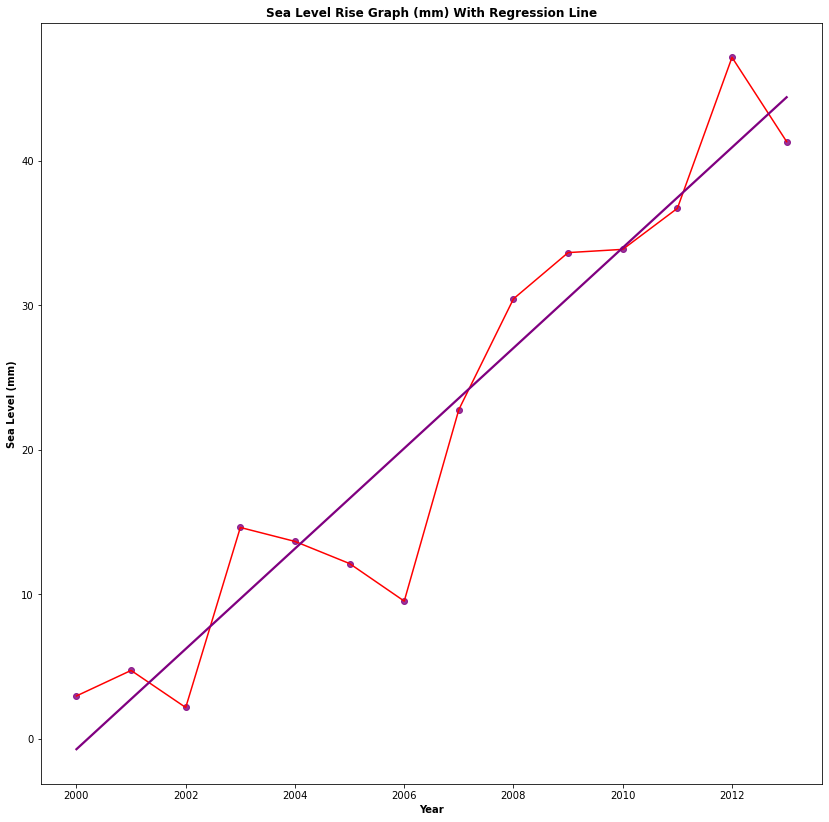

In [148]:
plt.title("Sea Level Rise Graph (mm) With Regression Line", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Sea Level (mm)", fontweight = 'bold')
sns.lineplot(x = years, y = sealevel_mm, color = 'red')
sns.regplot(x = years, y = sealevel_mm, ci = False, color = 'purple')

Before we move onto predicting how sea levels are going to be affected in the future, let us analyze what we currently have above. The year is plotted on the x-axis, and the sea level in mm for that year is plotted on the y-axis, which is made easy with the way this data is organized. The purple line represents our regression line, while the red line represents the points of our actual data. Just like our emissions data, our regression line for the sea level is positive and steep, which indicates that as the year increases, our sea level keeps rising at a drastic level, indicated by the steepness of the regression line. By doing linear regression, we were able to find the regression coeficcient, which is 3.47 mm/year. This indicates that each year, our sea level is rising at about 3.47 mm. 

Additionally, it is possible that some cities could start being close to getting submerged as the sea level starts to rise. The Maldives, for example, has an average elevation of 3 ft, which is about 915 mm. If sea levels continue to rise at this rate, it is possible to lose about 80% of its land by 2100, according to the website: 
- https://www.livescience.com/what-places-disappear-rising-sea-levels

**Thus, using this data, we can make a prediction that annual global sea levels are going to continue to drastically increase in the next 10 years from our current year 2022. We will test these predictions shorty.**

## Surface Temperature:

##### First, let's figure out by how much (in Celsius) surface temperatures have changed over the years, and we will use linear regression to do so.  Let us first state our null hypothesis. If you need a refresher on what it is, look at its description above when we are doing linear regression on emissions. 

**Null Hypothesis:** There is no relationship between the year and the annual temperature in celsius. 

In [153]:
regression_temp = LinearRegression()
# Let's find the average temperature for each year and then store it in an array and create another array for years
average_temperature = np.array(tidy_temperature.groupby("Year")['Average Surface Temperature This Year (Celsius)'].mean())
years = list(range(2000,2014))

# Add each year in its own little array to create a 2D array for the fit
y = []
for year in years:
    y.append([year])
    
# use ols to calculate the p value
df = pd.DataFrame({'years':years, 'avg_temp':average_temperature})
# performs ols regressions with temperature dependent on years and extracts the p value
model = sm.ols('avg_temp~years', data=df).fit().pvalues[1]
print('\033[1m' + "P value : " + str(model) + '\033[0m')

P value : 0.04676319420432148


Since our p value is less than 0.05, we can reject our null hypothesis and accept an alternate hypothesis, claiming that there is a relationship between the year and annual global temperature rise. Thus, we can find a coefficient that tells us how much the anuual global temperature in celsius rises as the years go by.

In [154]:
# fit the model for linear regression so that we can access the coefficient
regression_temp.fit(y, average_temperature)
coefficient_temp = regression_temp.coef_[0]
print('\033[1m' + "Annual Temperature is rising by : " + str(coefficient_temp) + " celsius per year" + '\033[0m')

Annual Temperature is rising by : 0.01585364118205028 celsius per year


##### Now, let's create a graph for average surface temperature rise that contains the regression line. 

<AxesSubplot:title={'center':'Average Surface Temperature Rise Graph (mm) With Regression Line'}, xlabel='Year', ylabel='Surface Temperature (Celsius)'>

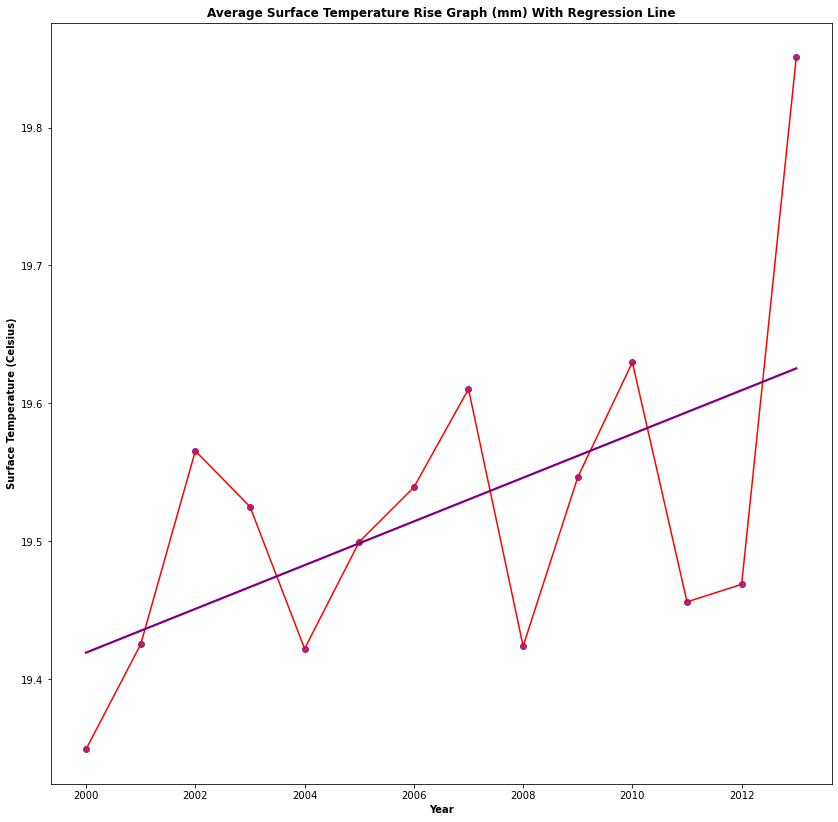

In [155]:
plt.title("Average Surface Temperature Rise Graph (mm) With Regression Line", fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Surface Temperature (Celsius)", fontweight = 'bold')
sns.lineplot(x = years, y = average_temperature, color = 'red')
sns.regplot(x = years, y = average_temperature, ci = False, color = 'purple')

Before we move onto predicting how surface temperature is going to be affected in the future, let us analyze what we currently have above. I took the mean of all of temperatures for each individual year so that I can quantify each year with a single value and then plotted the surface temperature for each year so I can get an overall picture of the rate at which surface temperatures are globally increasing every year. The purple line represents our regression line, while the red line represents the points of our actual data. Just like our emissions data, our regression line for the sea level is positive and steep, which indicates that as the year increases, our average global temperature increases drastic level, indicated by the steepness of the regression line. By doing linear regression, we were able to find the regression coeficient, which is 0.0158 degrees celsius/year. This indicates that each year, the global surface is increasing at about 0.0158 degrees celsius a year. **Thus, using this data, we can make a prediction that annual global surface temperatures are going to continue to drastically increase in the next 10 years from our current year 2022. We will test these predictions shorty.**

## Now that we have found the regression coeficients and analyzed the graphs above with the regression line, let's use linear regression to support or disprove our predictions for the future. 

### First, let's start with the predicting what our emissions data will look 10 years from now:

In [156]:
from sklearn.model_selection import train_test_split
years = [[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033]]

# predict what the emissions will use the linear equation we found before and predict the response variable for
# a year that we do not have data for.
y_pred_emissions = regression_emissions.predict(years)

# create a dataframe with the predicted values
emissionspred = pd.DataFrame()
emissionspred['Year'] = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]
emissionspred['Predicted CO2 Emissions (Tonnes)'] = y_pred_emissions
emissionspred

,Year,Predicted CO2 Emissions (Tonnes)
0,2023,4.558619e+10
1,2024,4.645877e+10
2,2025,4.733135e+10
3,2026,4.820393e+10
4,2027,4.907651e+10
5,2028,4.994910e+10
6,2029,5.082168e+10
7,2030,5.169426e+10
8,2031,5.256684e+10
9,2032,5.343942e+10


**Analysis:** As we can see from our predictions above, 2023, which is the next year, is estimated to have a global CO2 emission rate of 45 billion tonnes, and 10 years later, at 2033, the global CO2 emission rate is estimated to be 54 billion tonnes. Based on the prediction that was built on the result of fitting the model, we can see that annual CO2 emissions are in fact increasing as the years go on, just like I thought they would. According to a United Nations report, emissions in 2030 are expected to reach about 54 gigatons, which is approximately 54 billion tonnes, which is fairly close in amount to the 52 billion tonnes our model predicted it to be. The UN further states that by 2030, we will be about 12 to 24 billion tonnes above where we need to to be in order to minimize the effects of global warming.

**Link:** 
- https://www.un.org/sustainabledevelopment/blog/2016/11/report-world-must-cut-further-25-from-predicted-2030-emissions/

### Next, let's predict what the global sea level data will look 10 years from now:

In [157]:
years = [[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033]]

# predict what the emissions will use the linear equation we found before and predict the response variable for
# a year that we do not have data for.
y_pred_sea = regression_sea.predict(years)

# create a dataframe with the predicted values
sea_pred = pd.DataFrame()
sea_pred['Year'] = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]
sea_pred['Predicted Global Sea Level (mm)'] = y_pred_sea
sea_pred

,Year,Predicted Global Sea Level (mm)
0,2023,79.141535
1,2024,82.614465
2,2025,86.087395
3,2026,89.560325
4,2027,93.033255
5,2028,96.506185
6,2029,99.979115
7,2030,103.452045
8,2031,106.924975
9,2032,110.397905


As we can see from the prediction above, 2023, which is the next year, is projected to have an average global sea level of 79.14 mm, and 2033, which 10 years later, is projected to have an average global sea level of 113.87 mm. Based on the prediction that was built on the result of fitting the model, we can see that average global sea level is in fact increasing as the years go on, as I thought it would. In fact, according to climate.gov, the rate at which the global sea level is rising is constantly acclerating, and it started rising at a rate of about 3.6 mm, which is close to the 3.4 mm rise we calculated for our regression coefficient above, so we can rationalize that in 10 year, the global sea level will hit about close to 100 mm. Therefore, places like the Maldives, like we previously, are clearly at risk as more and more of its land is getting submerged.

**Link:**
- https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level

### Finally, let's predict what the global surface temperature will look 10 years from now:

In [158]:
years = [[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033]]

# predict what the emissions will use the linear equation we found before and predict the response variable for
# a year that we do not have data for.
y_pred_temp = regression_temp.predict(years)

# create a dataframe with the predicted values
temp_pred = pd.DataFrame()
temp_pred['Year'] = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]
temp_pred['Predicted Average Global Temperature (Celsius)'] = y_pred_temp
temp_pred

,Year,Predicted Average Global Temperature (Celsius)
0,2023,19.783882
1,2024,19.799736
2,2025,19.815590
3,2026,19.831443
4,2027,19.847297
5,2028,19.863151
6,2029,19.879004
7,2030,19.894858
8,2031,19.910711
9,2032,19.926565


As we can see from above, in 2023, the predicted average temperature is about 19.78 degrees celsius, and by 2033, it is expected to rise to about 19.94 degrees celsius. Overall, the average global temperature seems to be increasing as the years go by, which is what I predicted would happen, and it makes logical sense given that as our emissions rates continue to increase in 10 years, so will the average global temperature. 

# 5) Conclusion

**Quick Summary of Everything So Far:** Let us quickly reiterate what we found overall, we first graphed the average global CO2 emissions in tonnes vs the year, the average sea level in mm vs the year, and the average global temperature in celsius vs year from 2000 to 2013, and we found that each of these graphs show an increasing trend, meaning that average global emissions, sea level, and temperatures are all rising as the years go on. Then, we went on to figure out which countries produce the largest amount of emissions, which we figured out were China and the United States. Then, we used linear regression in order to set the stage for predicting how global emissions, temperature, and sea level would be affected in the future, and the model is used to predict that all three of these would indeed continue to rise in the future if nothing is done to stop it, based on their respective correlation coefficients that we calculated from the linear regression. Now that we have all of this data, let's talk about what our next steps are.

**Next Steps:** Climate changes poses a great threat to all of us, and floods, wildfires, heatwaves, and other issues caused by rising temperatures and sea levels are affecting communities all around the world. All countries need to work together in order to slowly eradicate the climate crisis. China, who was leading in global emissions in 2013, is now taking steps transition into a green economy as of 2022. According to World Bank, China estimates that it will no longer build coal powered plants abroad, and it is well positioned to reach its climate commitment goals. Additionally, the U.S. department of state continues that the United States is trying to reduce greenhouse gas emissions by about 50-52% below what it was in 2005 by 2030. With commitments from leaders at the Leaders Summit on Climate and other pledges, countries are trying to limit global warming to 1.5 degrees celsius. 

**To read more about it, you can look at these sources:**
- https://www.state.gov/policy-issues/climate-crisis/#:~:text=Mobilizing%20a%20whole%2Dof%2Dgovernment,COP27%20and%20the%20U.S.%20Center.
- https://www.worldbank.org/en/news/press-release/2022/10/12/china-s-transition-to-a-low-carbon-economy-and-climate-resilience-needs-shifts-in-resources-and-technologies#:~:text=China%20already%20has%20an%20estimated,green%20and%20low%2Dcarbon%20energy.

If countries manage to come together and continue to make efforts to set strict emission targets and move towards more sustainable practices, it is possible that we can prevent the predicted future of global temperatures and sea levels rising at at a continously increasing rate, and create a better future for ourselves and future generations. 